In [6]:
# Import relevant packages
import gurobipy as gp                 # Gurobi Python API
from gurobipy import GRB              # Gurobi constants (e.g., GRB.MAXIMIZE)

import pandas as pd                   # DataFrames
import matplotlib.pyplot as plt       # Plotting
import numpy as np                    # Numerical operations (similar to Julia base)

import warnings
warnings.filterwarnings("ignore", message=".*All values for SymLogScale are below linthresh.*")

In [7]:
# Import auxiliary functions
from functions_data import *
from functions_model import *
from functions_plots import *
# from functions_policy import *

In [8]:
from main import main

# Main Code

  Player   OC   Eta   E_max  Q_max  \
0      A  5.0  0.85   370.0  188.0   
1      B  5.0  0.85   750.0  377.0   
2      C  5.0  0.85  1130.0  566.0   
3      D  5.0  0.85  1510.0  755.0   

                                             Q_steps  
0  [0.0, 18.8, 37.6, 56.4, 75.2, 94.0, 112.8, 131...  
1  [0.0, 37.7, 75.4, 113.1, 150.8, 188.5, 226.2, ...  
2  [0.0, 56.6, 113.2, 169.8, 226.4, 283.0, 339.6,...  
3  [0.0, 75.5, 151.0, 226.5, 302.0, 377.5, 453.0,...  
Convergence has not been reached. Let's try again by fixing player A outputs.
Convergence has not been reached. Let's try again by fixing player B outputs.
Optimization was successful. It converged in 59 iterations.


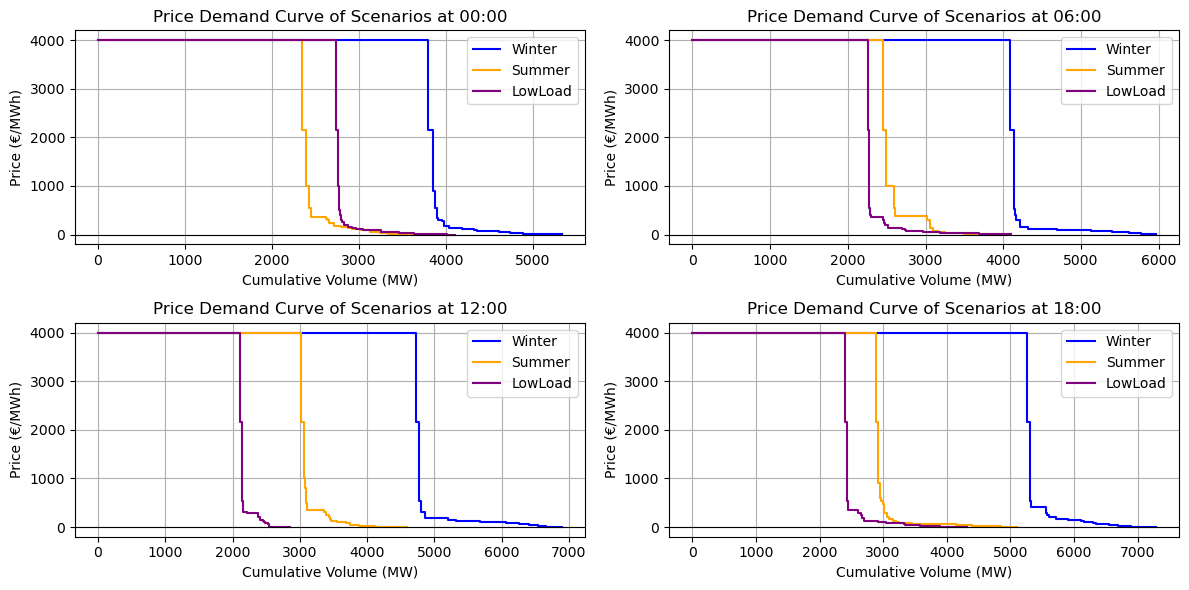

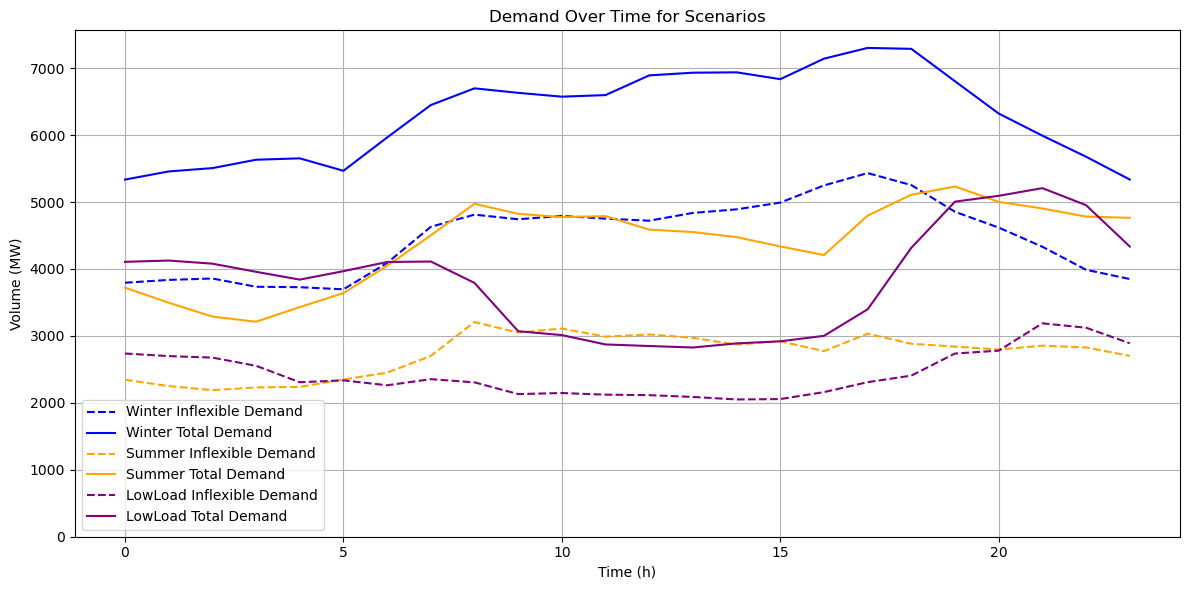

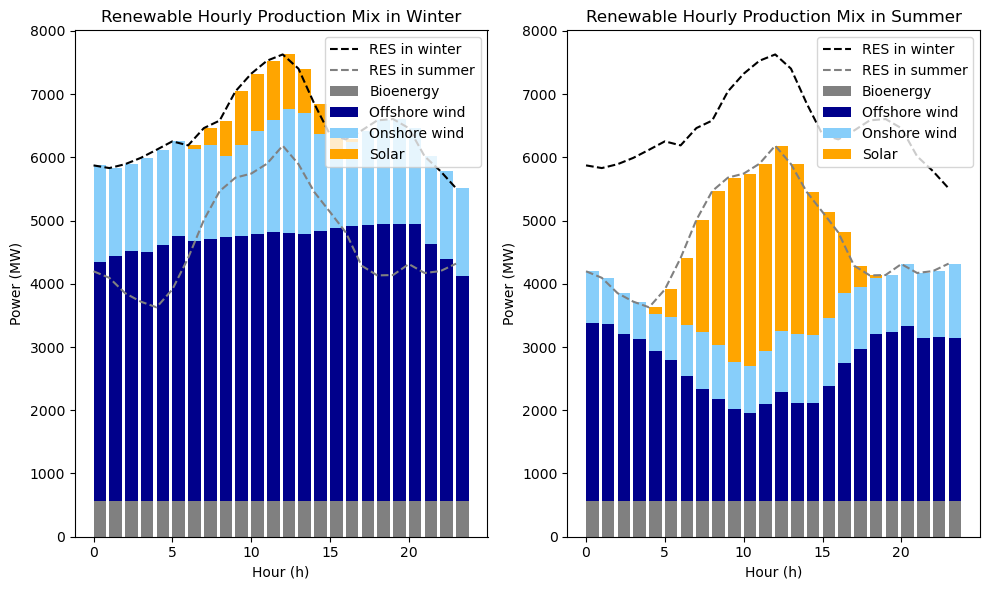

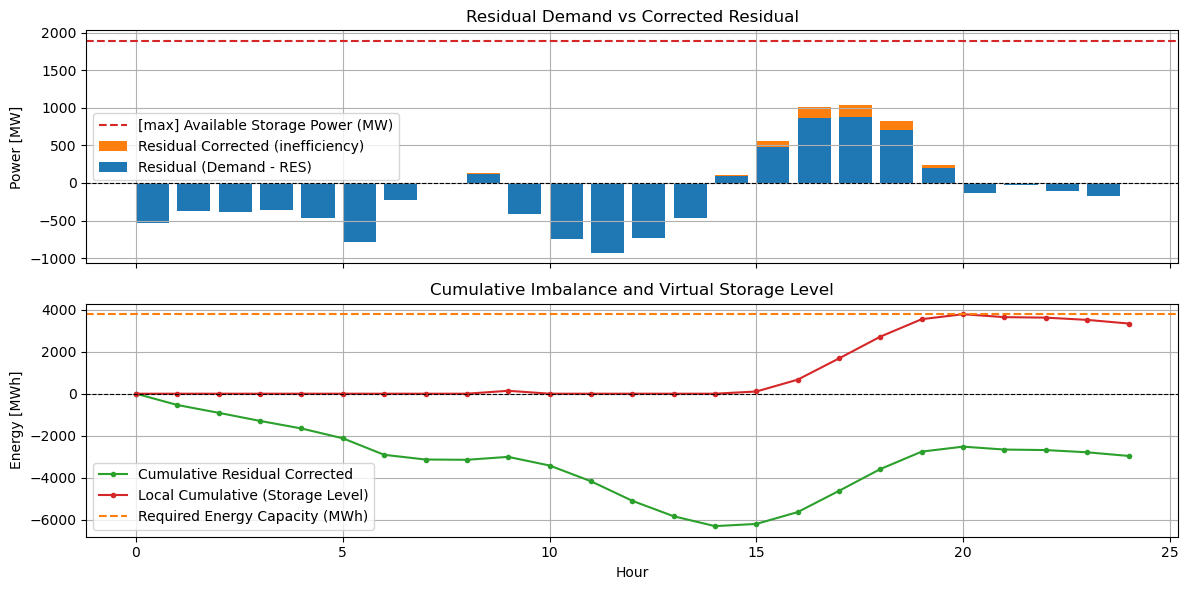

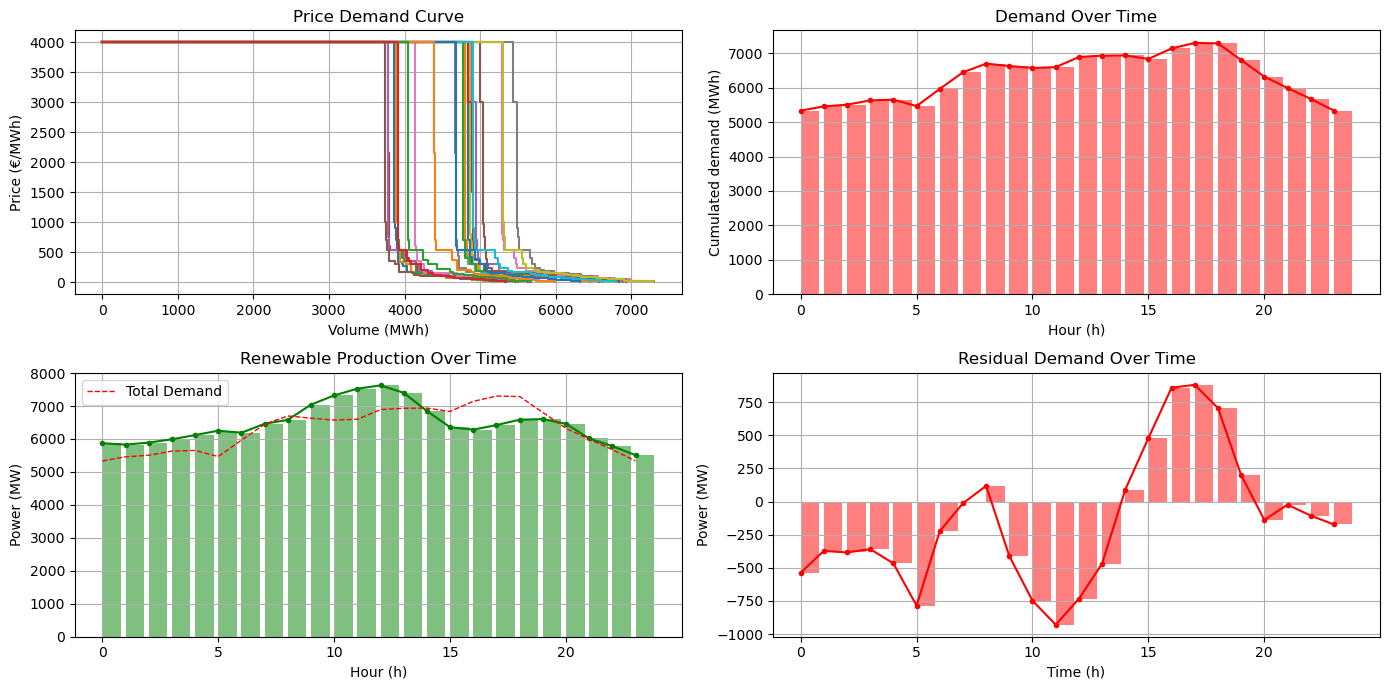

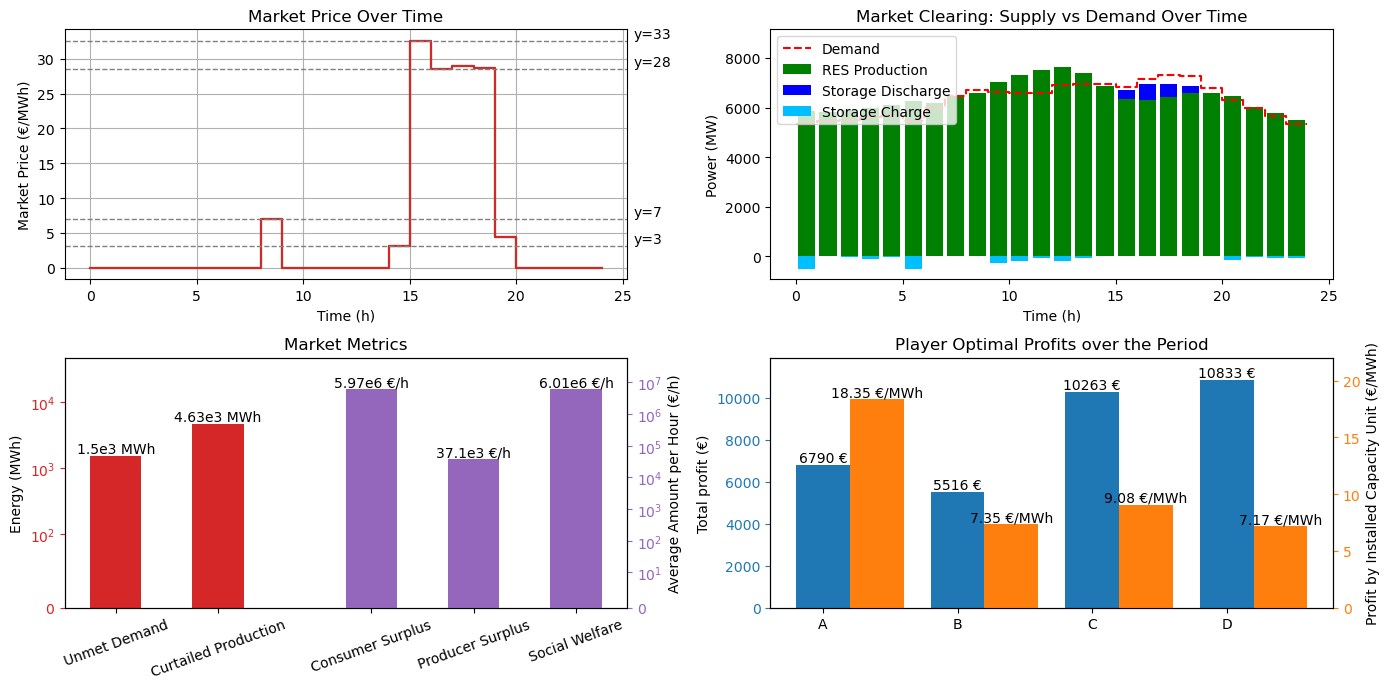

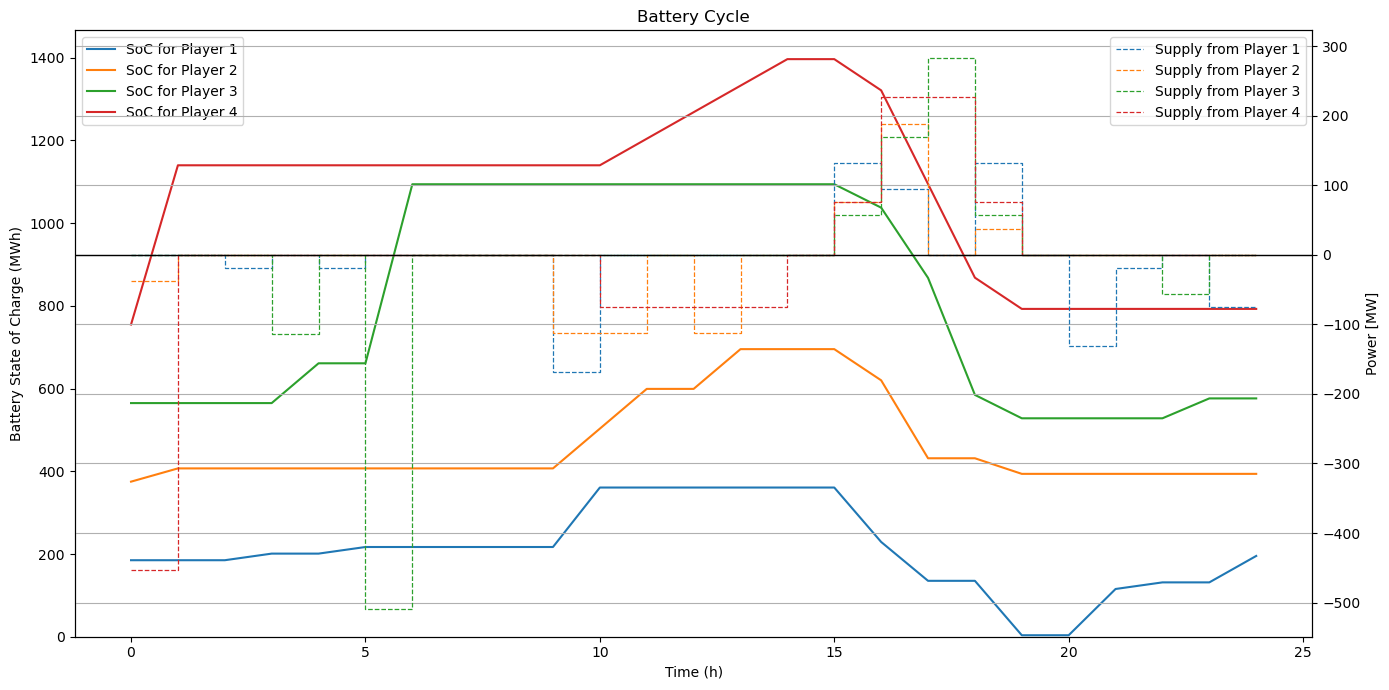

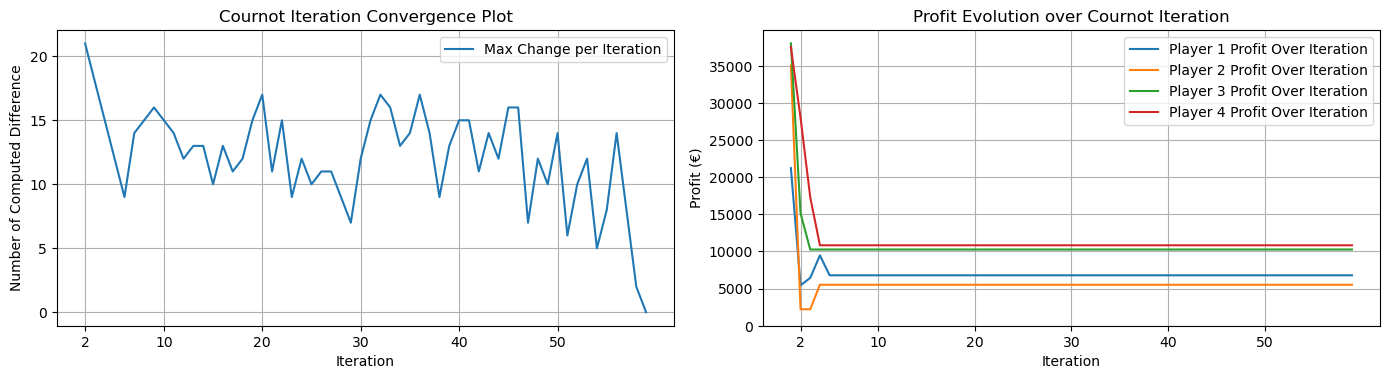

In [9]:
## === Initialization of the problem ===
# Set changing parameters
season = "Winter"           # Modelled season \in {"Winter", "Summer", "LowLoad"}
plots = False
data_plots = True
bidding_zone = "DK2"        # Modelled Denmark bidding zone \in {"DK1", "DK2"} for price demand curve
n_players = 4               # Number of storage players in the Cournot game \in {1, 2, 4, 6, 8}
alpha_batt = 0.5            # Initial storage level (%)
min_eta = 0.85              # Minimal storage round-trip efficiency
OC_default = 5              # Default storage operating cost
storage_Crate_default = 0.5 # Charge/discharge rate relative to energy capacity. A 1C battery can discharge fully in 1 hour.
N = 10                      # Discretization number for power outputs
D = 20                      # Discretization number for price demand curve steps
tol = 1e-5                  # Nash equilibrium tolerance parameter
max_iter = 50               # Nash equilibrium maximum iteration number

# Diverse parameters
diff_table_initial = []     # Store the difference between model outputs for each iteration

# Set time horizon parameters
T = 24              # number of time periods
TIME = range(T)    # time periods iterable


main()

In [10]:
scenarios = [
    {"name": "baseline", "policy_type": "none"},
    {"name": "flat_tariff", "policy_type": "grid_tariff_flat", "tau_ch": 5.0, "tau_dis": 0.0},
    {"name": "dynamic_tariff", "policy_type": "grid_tariff_dynamic", "alpha": 0.1},
    {"name": "all_policies", "policy_type": "all", "tau_ch": 5.0, "tau_dis": 0.0,
     "P_max": 10, "payment_rate": 3000, "q_charge_curt": curtailed_energy, "price_curt": 10}
]

for sc in scenarios:
    adjusted = apply_policy_to_revenue(base_revenue, q_charge, q_discharge, price,
                                       sc["policy_type"], **{k: v for k, v in sc.items() if k != "name" and k != "policy_type"})
    print(sc["name"], adjusted)


NameError: name 'curtailed_energy' is not defined